In [ ]:
Data Description:
- The dataset consists of three columns and 2000 rows which includes two feature columns and one label column.
- Features columns are in the form of float and continuous values ranges from [-9.462311 to 9.659887] and [-11.017154 to 11.227412] and the means are at [0.035789 and 0.170252].
- Whereas label is in the form discreate numerical integer values that inclueds [0 and 1]. 50% of the data consists of 0 and rest consists of 1 as labels.
- There are zero duplicates and no null values consists in the dataset.
- Pattern that is formed by the input features is two spirals shape. That means one sprial consists of labels as 0 and the other consists of 1.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\chauh\Downloads\8.twospirals.csv",header=None)

In [4]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [8]:
df.describe()

,0,1,2
count,2000.000000,2000.000000,2000.000000
mean,0.035789,0.170252,0.500000
std,5.580847,6.480102,0.500125
min,-9.462311,-11.017154,0.000000
25%,-4.589943,-4.790316,0.000000
50%,-0.126161,0.039630,0.500000
75%,4.835311,5.460470,1.000000
max,9.659887,11.227412,1.000000


In [9]:
df[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[[0,1]],df[2],test_size=0.2,random_state=42)

In [27]:
X_train.shape, X_test.shape

((1600, 2), (400, 2))

In [28]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [29]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [30]:
model = Sequential()
model.add(Dense(6,activation="relu",input_dim=2))
model.add(Dense(5,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 18        
                                                                 
 dense_8 (Dense)             (None, 5)                 35        
                                                                 
 dense_9 (Dense)             (None, 4)                 24        
                                                                 
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
 dense_11 (Dense)            (None, 2)                 8         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable 

In [32]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
history = model.fit(X_trains,y_train,epochs=50,batch_size=12,validation_split=0.2)

Epoch 1/50
107/107 [==============================] - 3s 7ms/step - loss: 0.6935 - accuracy: 0.4617 - val_loss: 0.6936 - val_accuracy: 0.4563
Epoch 2/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5117 - val_loss: 0.6934 - val_accuracy: 0.4563
Epoch 3/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5117 - val_loss: 0.6873 - val_accuracy: 0.4563
Epoch 4/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5281 - val_loss: 0.6686 - val_accuracy: 0.6125
Epoch 5/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6305 - val_loss: 0.6620 - val_accuracy: 0.6313
Epoch 6/50
107/107 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.6516 - val_loss: 0.6606 - val_accuracy: 0.6187
Epoch 7/50
107/107 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6602 - val_loss: 0.6535 - val_accuracy: 0.6281
Epoch 

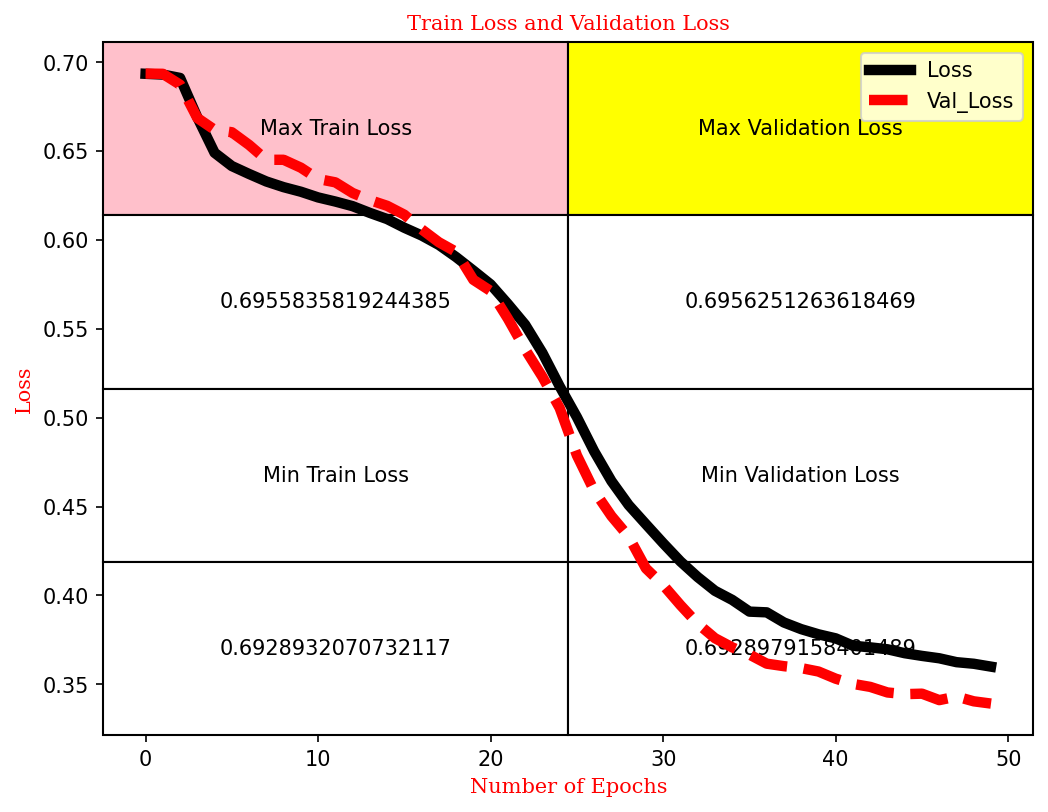

In [34]:
plt.figure(figsize=(8,6),dpi=150)
plt.plot(history.history["loss"],'black',linewidth=5)
plt.plot(history.history["val_loss"],'r--',linewidth=5)
plt.table(cellText=[[data[:,0].max(),data[:,1].max()],["Min Train Loss","Min Validation Loss"],[data[:,0].min(),data[:,1].min()]],cellLoc='center',colWidths=[0.4,0.4,0.4],
         colLabels=['Max Train Loss','Max Validation Loss'],colColours=['pink','yellow'],bbox=[0,0,1,1])
plt.legend(["Loss","Val_Loss"])
plt.title("Train Loss and Validation Loss",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("Number of Epochs",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("Loss",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [35]:
from mlxtend.plotting import plot_decision_regions as pt

33750/33750 [==============================] - 59s 2ms/step


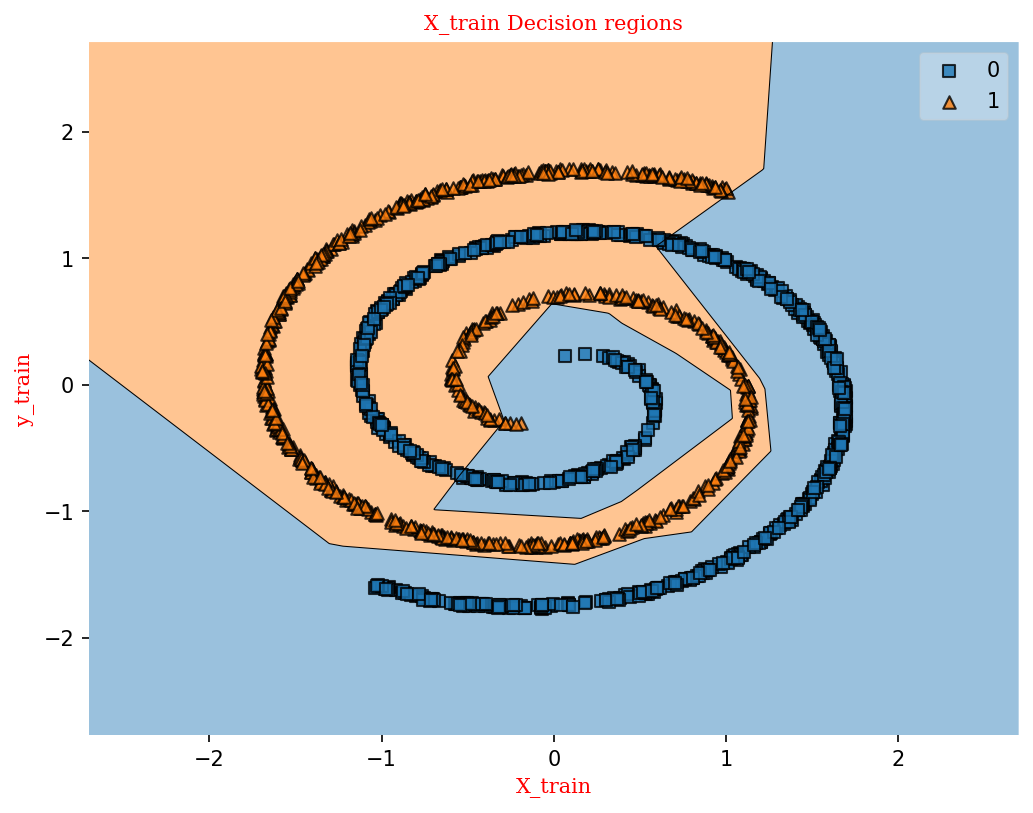

In [36]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_train",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_train",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [37]:
y_pred = model.predict(X_tests)

13/13 [==============================] - 0s 2ms/step


In [38]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

33750/33750 [==============================] - 58s 2ms/step


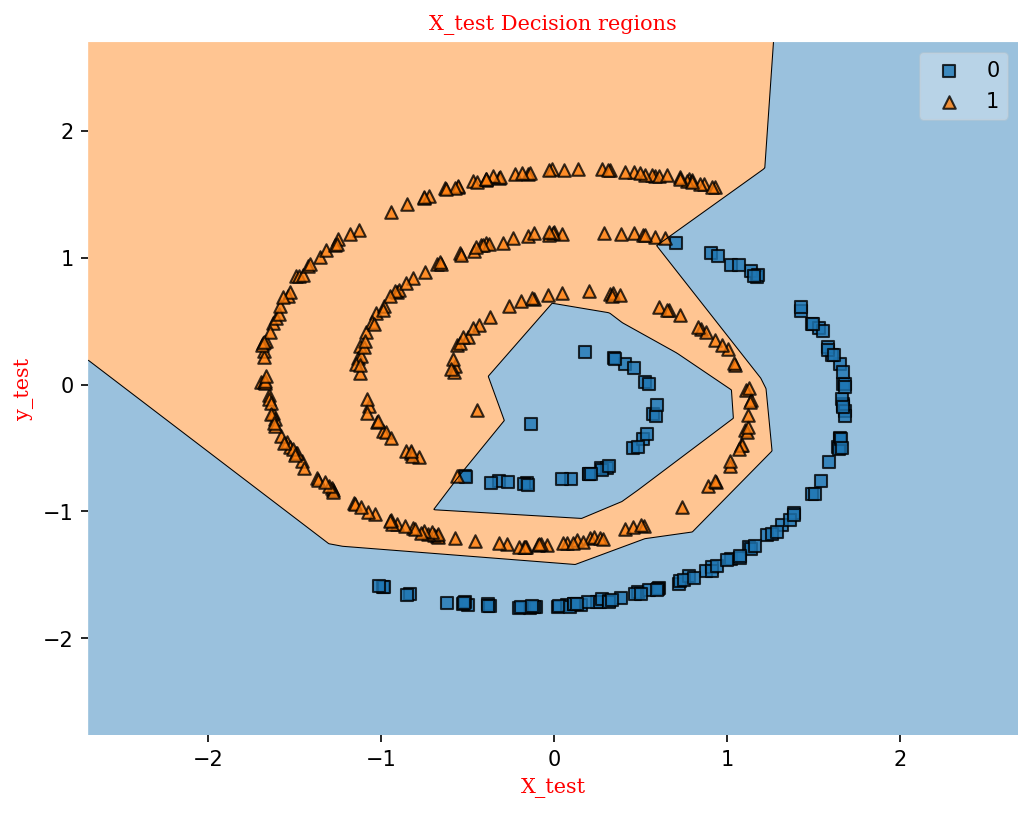

In [39]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_tests,y_predf.astype(int),clf=model)
plt.title("X_test Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_test",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_test",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.8425